In [1]:
# calculate the climatology for SST in daily resolution

import numpy as np
import pandas as pd



In [ ]:
def climatologyForSST(data_path, save_path):
    # load data
    data = pd.read_csv(data_path)
    data['date'] = pd.to_datetime(data['date'])
    data = data.set_index('date')
    data = data.resample('D').mean()
    data = data.dropna()
    # calculate climatology
    climatology = data.groupby(data.index.dayofyear).mean()
    climatology.to_csv(save_path)



In [32]:
def climatologyForSSTin30years(data_path, save_path):
    # load data
    data = pd.read_csv(data_path)
    data['date'] = pd.to_datetime(data['date'])
    data = data.set_index('date')
    indexOfStart = np.where(data.index == '1969-01-01')
    sst = data['sst']
    # calculate climatology
    for i in range(indexOfStart[0][0], len(data)):
        temp = data.iloc[:i]
        temp = temp.groupby(temp.index.dayofyear).mean()
        print(temp)
        sst[i] = temp['sst'][data.index[i]]
    climatology = data.groupby(data.index.dayofyear)
    # print(climatology)
    climatology = climatology.rolling(window=30).mean()
    climatology.to_csv(save_path)

data_path = './dataset/nan_lat_20.0_lon_118.0.csv'
save_path = './dataset/climatology.csv'
climatologyForSSTin30years(data_path, save_path)


             sst
date            
1     297.043293
2     297.011005
3     296.967121
4     296.915589
5     296.864883
...          ...
362   297.206496
363   297.170507
364   297.142299
365   297.118774
366   297.057946

[366 rows x 1 columns]


KeyError: Timestamp('1969-01-01 00:00:00')

In [71]:
data_path = './dataset/nan_lat_20.0_lon_118.0.csv'
save_path = './dataset/climatology.csv'
data = pd.read_csv(data_path)
data['date'] = pd.to_datetime(data['date'])
data = data.set_index('date')
climatology = data.groupby(data.index.dayofyear)
means = pd.DataFrame()
for name, group in climatology:
    # print(name)
    # print(group)
    # group.plot()
    # print(group.rolling(window=30).mean()[29:])
    # group.rolling(window=30).mean().plot()
    means = pd.concat([means, group.rolling(window=30).mean()[29:]])
    
# climatologys = pd.concat([data.iloc[:10593], means])
# climatologys.sort_index()
# sort by year month day
# means.index = pd.to_datetime(means.index, format='%Y-%m-%d')
means.sort_index(inplace=True)
means = pd.concat([data.iloc[:10593], means])
means.to_csv(save_path)
# indexOfStart = np.where(data.index == '1969-01-01')
# sst = data['sst']
# # calculate climatology
# for i in range(indexOfStart[0][0], len(data)):
#     temp = data.iloc[:i]
#     temp = temp.groupby(temp.index.dayofyear).mean()
#     print(temp)
#     sst[i] = temp['sst'][data.index[i]]
# climatology = data.groupby(data.index.dayofyear)
# # print(climatology)
# climatology = climatology.rolling(window=30).mean()
# climatology.to_csv(save_path)


In [4]:
means.plot()

NameError: name 'means' is not defined

<Axes: xlabel='date'>

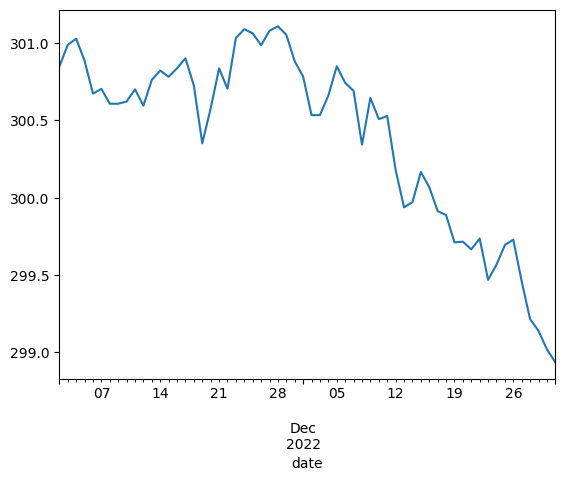

In [5]:
data = pd.read_csv('./dataset/multivariate/lat_14.0_lon_112.0.csv')
data['date'] = pd.to_datetime(data['date'])
data = data.set_index('date')
data['sst'][-60:].plot()

climatology for ./dataset/multivariate_11/oisst_lat_14.0_lon_112.0.csv is done!
climatology for ./dataset/multivariate_11/oisst_lat_14.0_lon_118.0.csv is done!
climatology for ./dataset/multivariate_11/oisst_lat_20.0_lon_112.0.csv is done!
climatology for ./dataset/multivariate_11/oisst_lat_20.0_lon_118.0.csv is done!


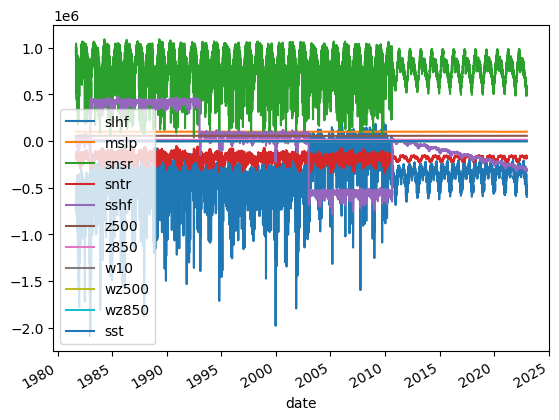

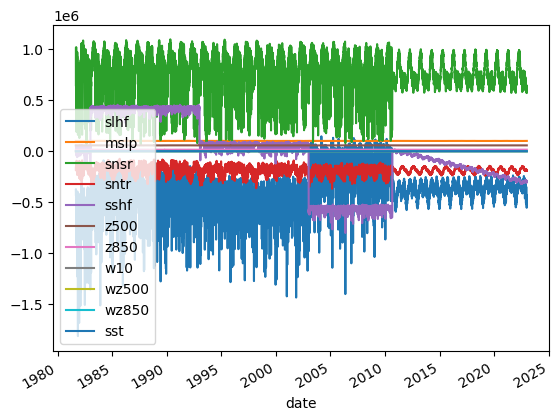

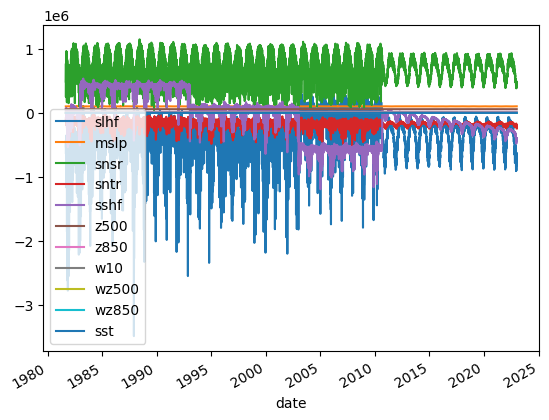

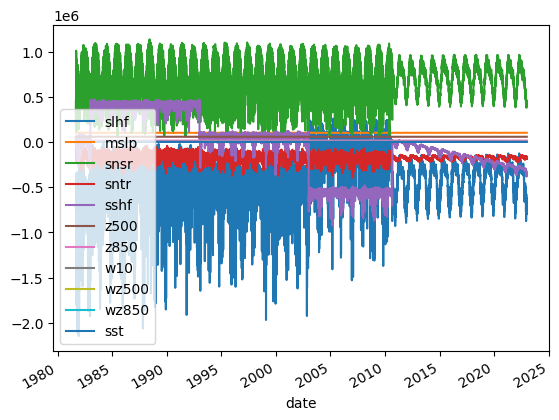

In [3]:
def climatologyForSST(data_path, save_path):
    # load data
    data = pd.read_csv(data_path)
    data_copy = data.copy()
    # data_copy = data_copy[['date'] + ['sst']]
    data_copy['date'] = pd.to_datetime(data_copy['date'])
    data_copy = data_copy.set_index('date')
    # calculate climatology
    climatology = data_copy.groupby(data_copy.index.dayofyear)
    means = pd.DataFrame()
    for name, group in climatology:
        means = pd.concat([means, group.rolling(window=30).mean()[29:]])
    means = means.sort_index()
    # means = pd.concat([data_copy.iloc[:10593], means])
    means = pd.concat([data_copy.iloc[:10592], means])
    means.plot()
    means.to_csv(save_path)

import glob
import os

# read all files in the folder
folder_path = './dataset/multivariate_11/'
files = glob.glob(os.path.join(folder_path, 'oisst_*.csv'))
for file in files:
    save_path = file.replace('oisst_lat_', 'climatology_oisst_lat_')
    climatologyForSST(file, save_path)
    print('climatology for ' + file + ' is done!')

nan
1.047672032015109
1.0581510273428207
1.0809988899161742
1.109831192869739
1.131212569178166
1.1515570097336332
1.1718682206915019
1.1922143711038997
1.2246870675128945
1.2503200683558324
1.281337272800049
1.3101845785995196
1.3373388825075967
1.3570679496620648
1.3743544448212772
1.3895202805284999
1.3990472436626296
1.4099497189616377
1.4078647780711524
1.408184370031141
1.4132851292880246
1.427048143313089
1.4432716676588189
1.4565856102543377
1.463164408624905
1.4607276508644593
1.4563998214776057
1.4451903761557974
1.434793912030575
1.4164951688351552
1.3762631737183604
1.3209530675488312
1.2630783665315468
1.2114007346869162
1.1639838672994285
1.1185629888388047
1.0711013350752578
1.017230688356055
0.9557806320838825
0.8931405264570632
0.8461283846635415
0.8079756143184855
0.7652665897145479
0.7225417058320357
0.6974355812546429
0.6889364121600783
0.7073013242836
0.737766957333638
0.7641334176699779
0.7966072286055825
0.8328262964148047
0.879109261317007
0.9211585495088962
0.9

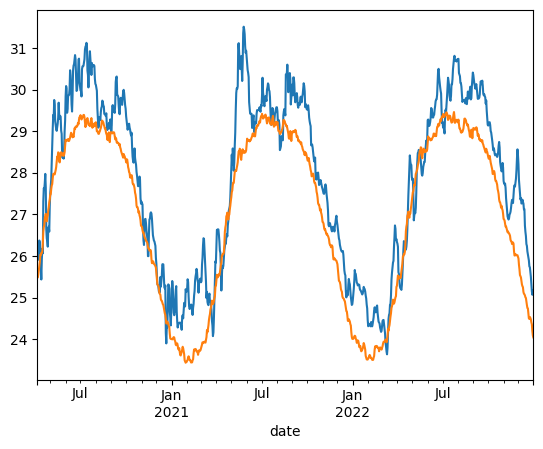

In [19]:
# visual
import matplotlib.pyplot as plt
data = pd.read_csv('./dataset/multivariate_11/climatology_oisst_lat_20.0_lon_118.0.csv')
data2 = pd.read_csv('./dataset/multivariate_11/oisst_lat_20.0_lon_118.0.csv')
data['date'] = pd.to_datetime(data['date'])
data = data.set_index('date')
data2['date'] = pd.to_datetime(data2['date'])
data2 = data2.set_index('date')

data2['sst'][-1000:].plot()
data['sst'][-1000:].plot()

for i in range(100):
    print(np.sqrt(np.mean(np.abs(data2['sst'][-10-i:-i] - data['sst'][-10-i:-i]))))